# Sheet 3

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 2 Similarity Measures on Jet Data Clusterings

(a)

load the ground truth labels and k-means partitions

In [ ]:
# the dijet labels, corresponding to bottom, charm, light quarks
labels = np.load('data/dijet_labels.npy')

# 5 rows, each corresponding to a k-means clustering with [2, 3, 5, 10, 20] clusters respectively
partitions = np.load('data/dijet_clusters.npy') 
ks = [2, 3, 5, 10, 20]

print(labels.shape, partitions.shape)

define function to create a hinton plot from a contingency matrix

In [ ]:
from matplotlib import pyplot as plt


def hinton_plot(matrix, max_weight=None, ax=None):
    """
    Draw Hinton diagram for visualizing a weight matrix. 
    From https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html
    """
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

In [ ]:
# TODO: compute the contingency matrices between labels and k-means partitions
#       (either implement your own or find the function in sklearn.metrics.cluster)

# TODO: visualize the contingency matrices via hinton plots and 
#       label the plots by the number of clusters used in k-means


(b)

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, v_measure_score

for k, partition in zip(ks, partitions):
    # TODO: compute and print the different scores as requested in the excercise

## 3 Mutual Information for Image Matching
(a)

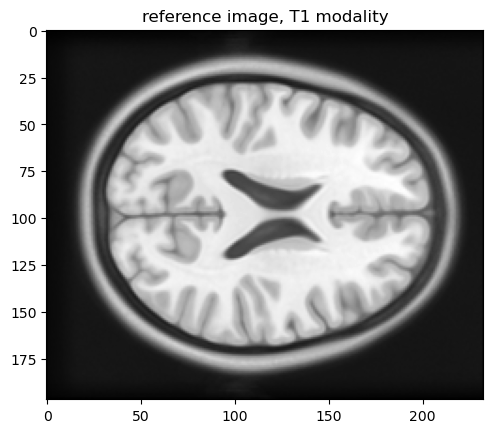

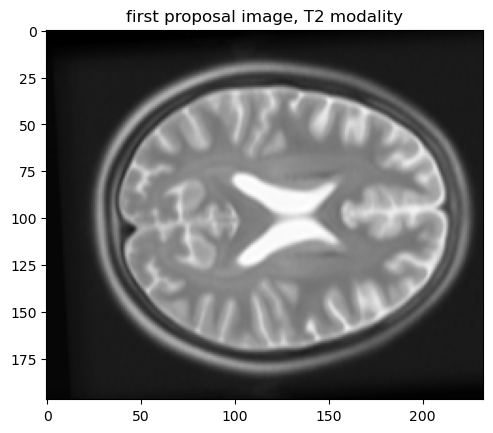

In [3]:
# load the reference image and the proposals
reference = np.load('data/t1_reference.npy')
proposals = np.load('data/t2_registration_proposals.npy')

plt.imshow(reference, cmap='gray')
plt.title('reference image, T1 modality')
plt.show();

plt.imshow(proposals[0], cmap='gray')
plt.title('first proposal image, T2 modality')
plt.show();

In [59]:
len(proposals)

16

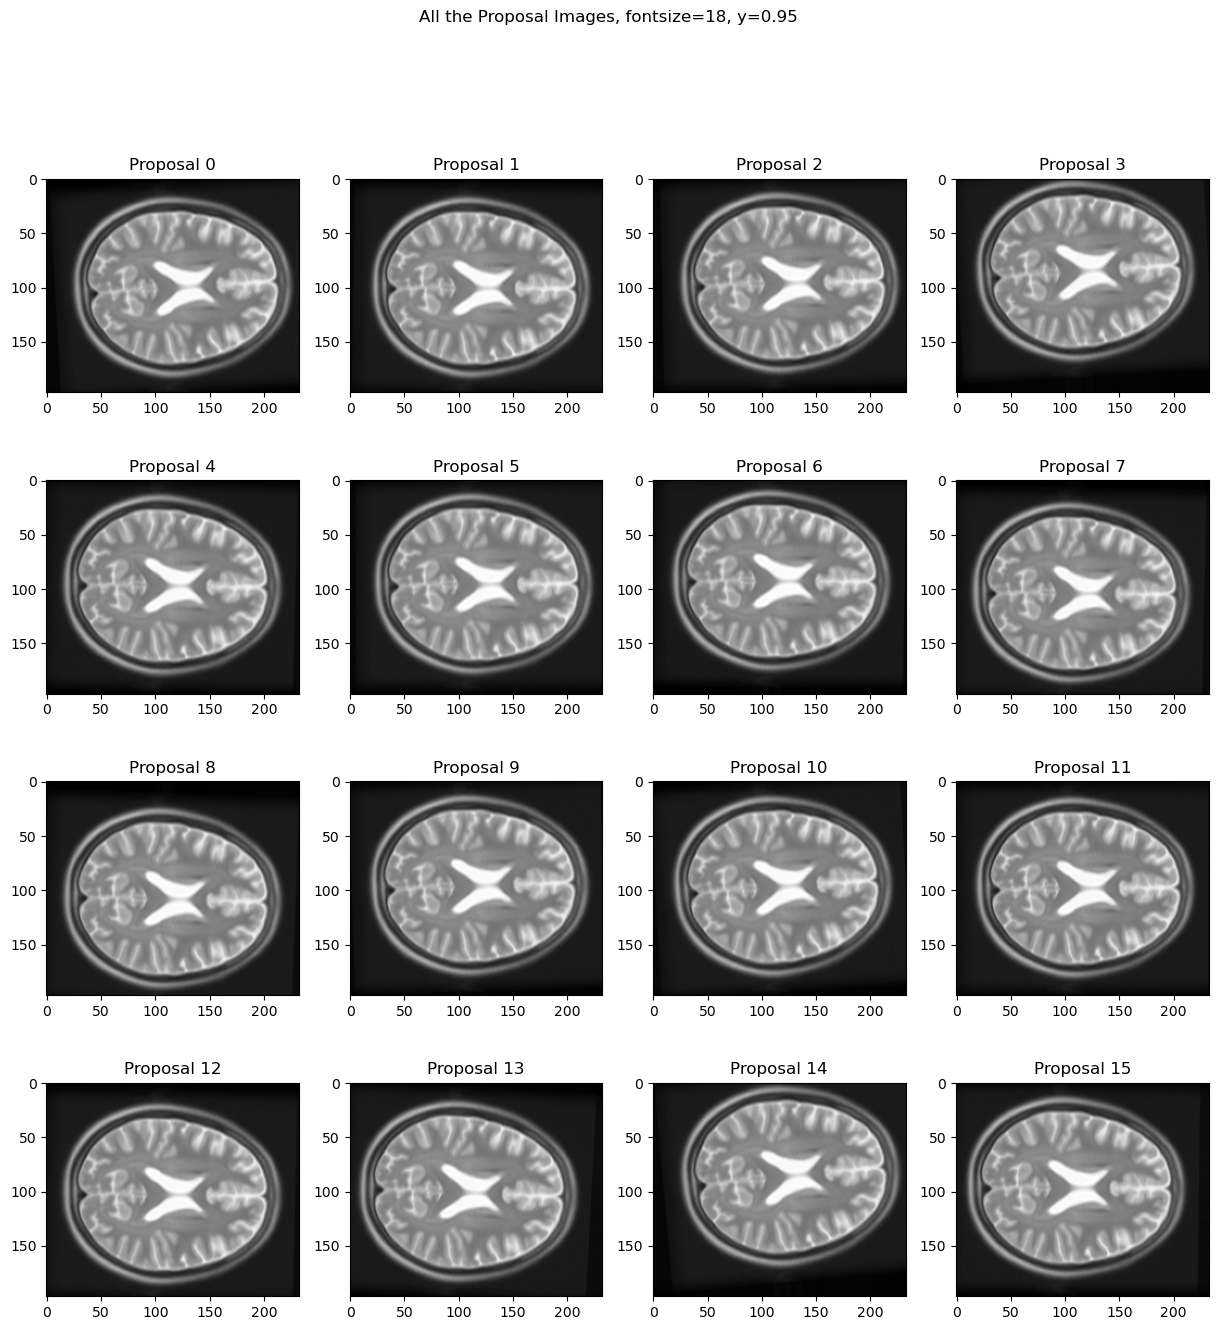

In [84]:
plt.figure(figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
plt.suptitle(f"All the Proposal Images, fontsize=18, y=0.95")
plt.tight_layout()

#setting no. of rows and columns for subplot
ncols = 4
nrows = len(proposals) // ncols + (len(proposals) % ncols > 0) # calculating number of rows

for n,proposal in enumerate(proposals):
    #adding subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    #plotting the image
    ax.imshow(proposal,cmap='gray')
    ax.set_title(f'Proposal {n}')

In [8]:
plt.scatter(reference[0][i],proposals[0][0][i])

0.3043467696988955

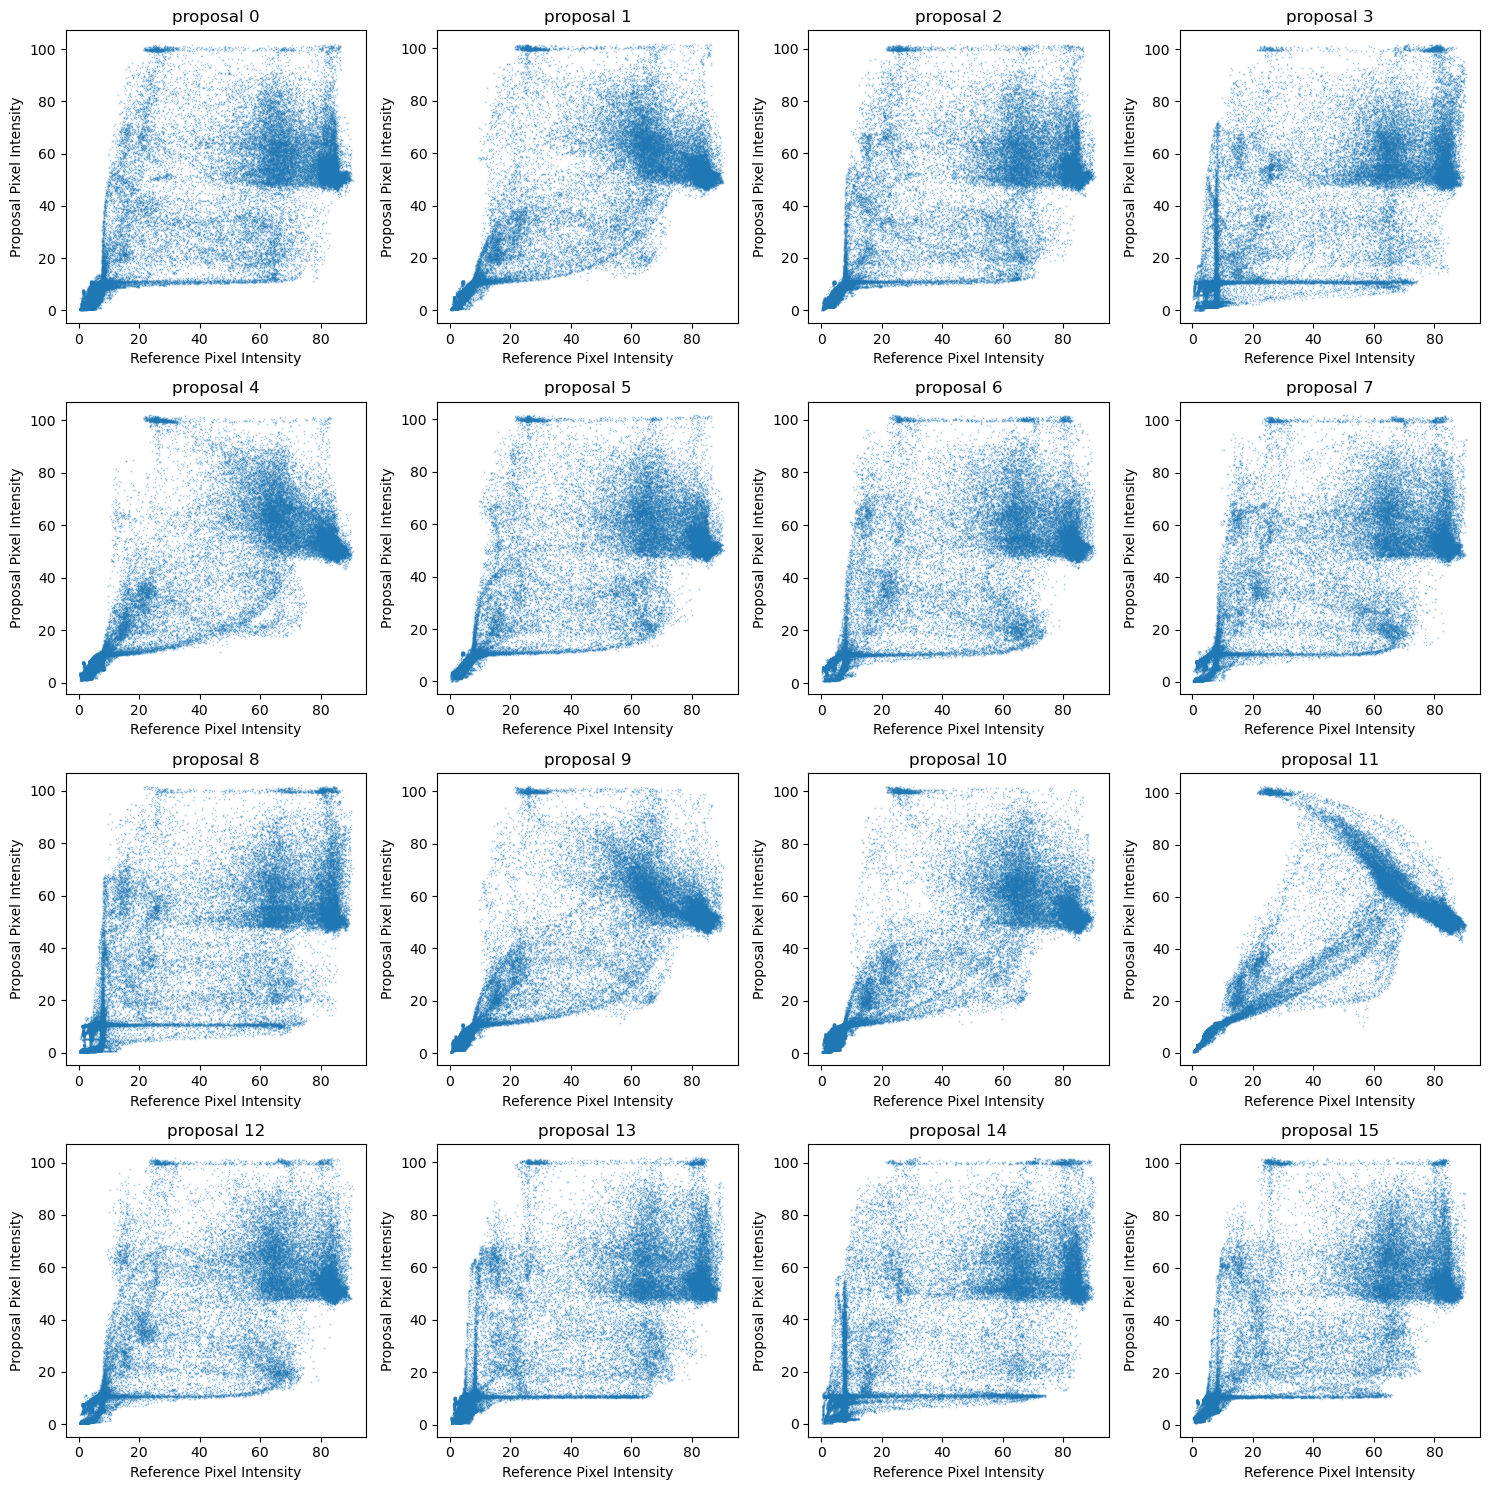

In [26]:
# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, proposal) in enumerate(zip(axs.flatten(), proposals)):
    # TODO: make a scatterplot of the reference pixel intensities vs the pixel intensities in the i-th proposal
    #       do not forget to label the axes
    ax.scatter(reference,proposal,marker='x',s=0.1,alpha=0.4)
    ax.set_xlabel('Reference Pixel Intensity')
    ax.set_ylabel('Proposal Pixel Intensity')
    ax.set_title(f'proposal {i}')
plt.tight_layout()
plt.show();

(b)

In [32]:
np.histogram2d(reference.flatten(),proposals[0].flatten())[0].shape

(10, 10)

In [49]:
reference.flatten().shape

(45901,)

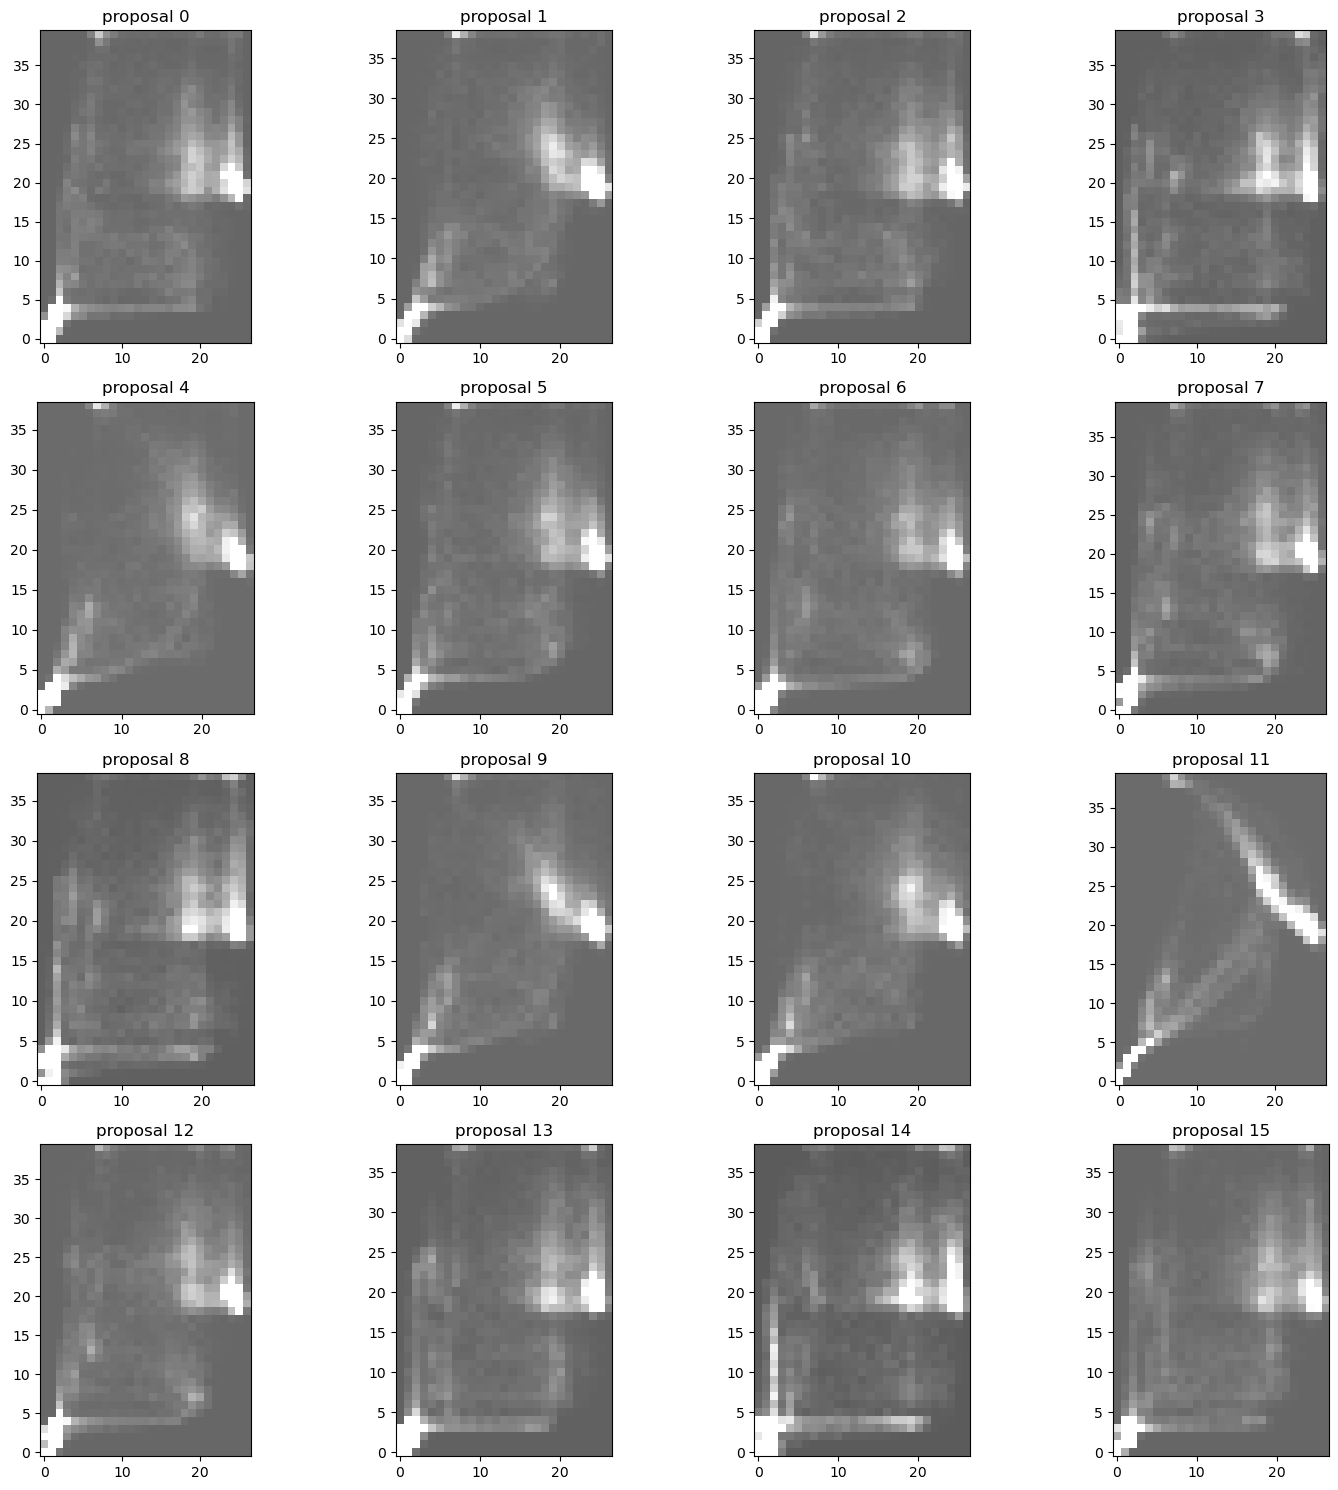

In [65]:
# TODO: For each proposal, create a 2D histograms of pixel intensities of it and the reference 
#       (Choose a sensible range and bins for the histogram)
# Hint: np.histogram2d, flatten the arrays as pixel positions don't matter
def bin_count(arr):
    '''
    Calculates the optimal bin counts using Friedman-Draconis rule
    '''
    q1 = np.quantile(arr,0.25)
    q3 = np.quantile(arr,0.75)
    iqr = q3 - q1
    bin_width = (2 * iqr) / (len(arr) ** (1 / 3))
    bin_count = int(np.ceil((np.max(arr) - np.min(arr)) / bin_width))
    return bin_count


histograms = [np.histogram2d(reference.flatten(),proposal.flatten(),bins=[bin_count(reference.flatten()),bin_count(proposal.flatten())])[0] for proposal in proposals]

# TODO: plot the histograms

# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, hist) in enumerate(zip(axs.flatten(), histograms)):
    # TODO: plot the histogram for the i'th proposal.
    ax.imshow(hist.T,interpolation='nearest', origin='lower',
    vmin=np.mean(hist.T) - 1*np.std(hist.T),vmax=np.mean(hist.T) + 1*np.std(hist.T), cmap='gray')
    ax.set_title(f'proposal {i}')
    
plt.tight_layout()
plt.show();

[0.825588473923245, 1.0679977636875855, 0.8508244181932912, 0.5221171262270731, 1.0912690886321839, 0.9401855364932399, 0.7927547072387264, 0.7607680913270718, 0.5830203972960499, 1.125125735276818, 1.0706079605973422, 1.5345980876027434, 0.819431597247593, 0.6489665968204823, 0.5295601734473236, 0.7410081353546203]
[ 3 14  8 13 15  7  6 12  0  2  5  1 10  4  9 11]


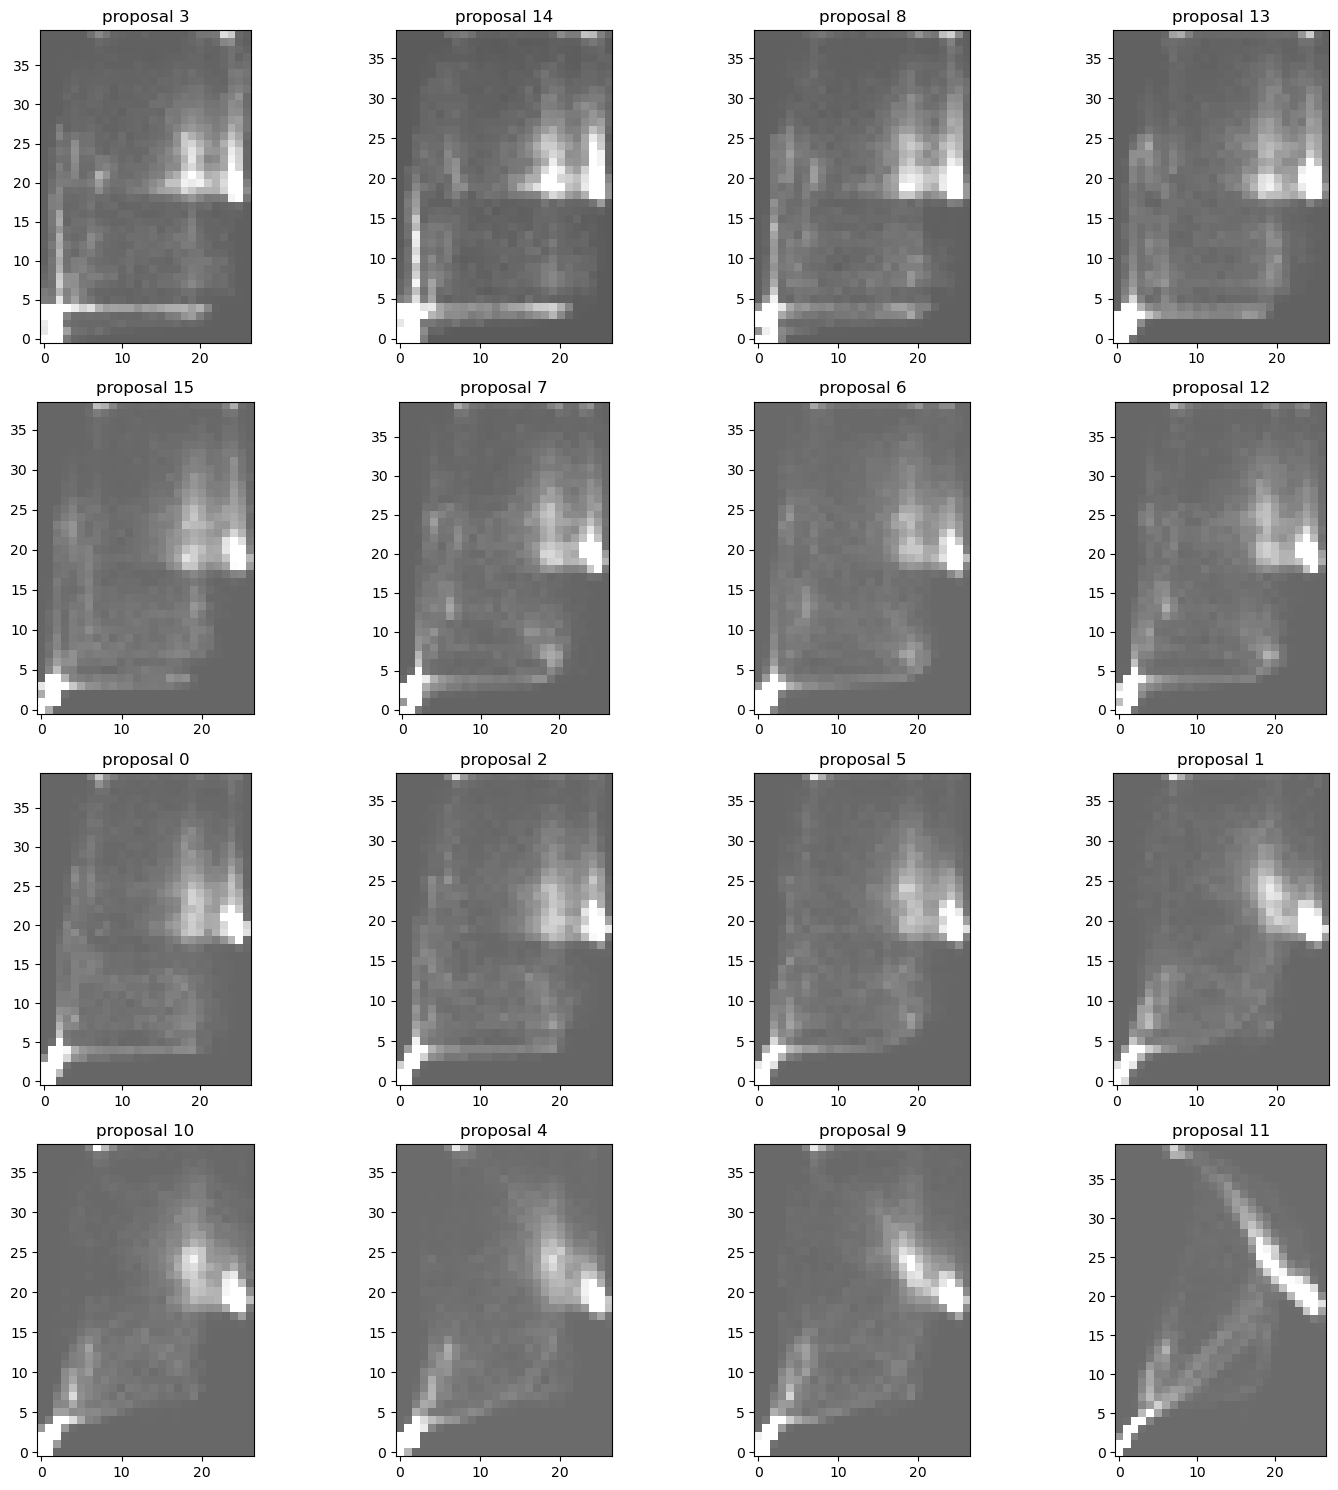

In [88]:
from sklearn.metrics import mutual_info_score

# TODO: for each histogram, compute the mutual information score
MI = [mutual_info_score(hist[:,0],hist[:,1],contingency=hist) for hist in histograms]
print(MI)

# TODO: order the proposal by MI, plot them in this order and include the scores in the titles of the plots
ind = np.argsort(MI)
print(ind)

# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, sort_i) in enumerate(zip(axs.flatten(), ind)):
    # TODO: plot the histogram for the i'th proposal.
    hist = histograms[sort_i].T
    ax.imshow(hist,interpolation='nearest', origin='lower',
    vmin=np.mean(hist) - 1*np.std(hist),vmax=np.mean(hist) + 1*np.std(hist), cmap='gray')
    ax.set_title(f'proposal {sort_i}')

plt.tight_layout()
plt.show();